In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read in the data
df = pd.read_csv('japan_birth.csv')
df.tail()

Unnamed: 0  year  birth_total  birth_male  birth_female  birth_rate  \
119         119  2018     918400.0    470851.0      447549.0         7.4   
120         120  2019     865239.0    443430.0      421809.0         7.0   
121         121  2020     840835.0    430713.0      410122.0         6.8   
122         122  2021     811622.0    415903.0      395719.0         6.6   
123         123  2022     770759.0    395257.0      375502.0         6.3   

     birth_gender_ratio  total_fertility_rate  population_total  \
119               105.2                  1.42         124218285   
120               105.1                  1.36         123731176   
121               105.0                  1.33         123398962   
122               105.1                  1.30         122780487   
123               105.3                  1.26         122030523   

     population_male  ...  mother_age_30-34  mother_age_35-39  \
119         60454898  ...          334906.0          211021.0   
120         60208034  ...          312582.0          201010.0   
121         60002838  ...          303436.0          196321.0   
122         59686643  ...          292439.0          193177.0   
123         59313678  ...          279517.0          183327.0   

     mother_age_40-44  mother_age_over_45  father_age_avg  \
119           51258.0              1659.0            34.0   
120           49191.0              1649.0            34.0   
121           47899.0              1676.0            34.1   
122           48517.0              1617.0            34.2   
123           46338.0              1658.0            34.2   

     father_age_firstborn  father_age_secondborn  father_age_thirdborn  \
119                  32.8                   34.6                  35.6   
120                  32.8                   34.7                  35.7   
121                  32.8                   34.7                  35.8   
122                  32.9                   34.8                  35.9   
123                  32.9                   34.8                  36.0   

     legitimate_child  illegitimate_child  
119          897359.0             21041.0  
120          845068.0             20171.0  
121          820795.0             20040.0  
122          793020.0             18602.0  
123          753031.0             17728.0  

[5 rows x 51 columns]

In [11]:
gdp_df = pd.read_csv('/Users/jevan/Documents/data_science/japan_births/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_6298258/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_6298258.csv', skiprows=4)
gdp_df = gdp_df[gdp_df['Country Name'] == 'Japan'].T.reset_index()[4:-1]
gdp_df

index                   119
4   1960    44307342950.400002
5   1961      53508617739.3778
6   1962    60723018683.733299
7   1963    69498131797.333298
8   1964    81749006381.511093
..   ...                   ...
62  2018  5040880939324.860352
63  2019  5117993853016.509766
64  2020  5048789595589.429688
65  2021  5005536736792.290039
66  2022  4232173916086.669922

[63 rows x 2 columns]

In [16]:
gdp_df['index'] = pd.to_datetime(gdp_df['index'], format='%Y')
gdp_df['index'] = gdp_df['index'].dt.year

df['year'] = pd.to_datetime(df['year'], format='%Y')
df['year'] = df['year'].dt.year


In [19]:
merged_df = pd.merge(df, gdp_df, left_on='year', right_on='index', how='outer')
merged_df = merged_df[merged_df['year'] >= 1922]
merged_df

Unnamed: 0  year  birth_total  birth_male  birth_female  birth_rate  \
23           23  1922    1969314.0   1004022.0      965292.0        34.3   
24           24  1923    2043297.0   1043599.0      999698.0        35.2   
25           25  1924    1998520.0   1019988.0      978532.0        33.9   
26           26  1925    2086091.0   1060827.0     1025264.0        34.9   
27           27  1926    2104405.0   1081793.0     1022611.0        34.6   
..          ...   ...          ...         ...           ...         ...   
119         119  2018     918400.0    470851.0      447549.0         7.4   
120         120  2019     865239.0    443430.0      421809.0         7.0   
121         121  2020     840835.0    430713.0      410122.0         6.8   
122         122  2021     811622.0    415903.0      395719.0         6.6   
123         123  2022     770759.0    395257.0      375502.0         6.3   

     birth_gender_ratio  total_fertility_rate  population_total  \
23                104.0                   NaN          57390100   
24                104.4                   NaN          58119200   
25                104.2                   NaN          58875600   
26                103.5                   NaN          59736822   
27                105.8                   NaN          60740900   
..                  ...                   ...               ...   
119               105.2                  1.42         124218285   
120               105.1                  1.36         123731176   
121               105.0                  1.33         123398962   
122               105.1                  1.30         122780487   
123               105.3                  1.26         122030523   

     population_male  ...  mother_age_40-44  mother_age_over_45  \
23          28799700  ...               NaN                 NaN   
24          29176900  ...               NaN                 NaN   
25          29568700  ...               NaN                 NaN   
26          30013109  ...               NaN                 NaN   
27          30521300  ...               NaN                 NaN   
..               ...  ...               ...                 ...   
119         60454898  ...           51258.0              1659.0   
120         60208034  ...           49191.0              1649.0   
121         60002838  ...           47899.0              1676.0   
122         59686643  ...           48517.0              1617.0   
123         59313678  ...           46338.0              1658.0   

     father_age_avg  father_age_firstborn  father_age_secondborn  \
23              NaN                   NaN                    NaN   
24              NaN                   NaN                    NaN   
25              NaN                   NaN                    NaN   
26              NaN                   NaN                    NaN   
27              NaN                   NaN                    NaN   
..              ...                   ...                    ...   
119            34.0                  32.8                   34.6   
120            34.0                  32.8                   34.7   
121            34.1                  32.8                   34.7   
122            34.2                  32.9                   34.8   
123            34.2                  32.9                   34.8   

     father_age_thirdborn  legitimate_child  illegitimate_child   index  \
23                    NaN               NaN                 NaN     NaN   
24                    NaN               NaN                 NaN     NaN   
25                    NaN               NaN                 NaN     NaN   
26                    NaN               NaN                 NaN     NaN   
27                    NaN               NaN                 NaN     NaN   
..                    ...               ...                 ...     ...   
119                  35.6          897359.0             21041.0  2018.0   
120                  35.7          845068.0             20171.0  

In [23]:
merged_df.drop(columns=['index', 'Unnamed: 0'], inplace=True)
merged_df.rename(columns={merged_df.columns[-1]: 'gdp'}, inplace=True)

merged_df


year  birth_total  birth_male  birth_female  birth_rate  \
23   1922    1969314.0   1004022.0      965292.0        34.3   
24   1923    2043297.0   1043599.0      999698.0        35.2   
25   1924    1998520.0   1019988.0      978532.0        33.9   
26   1925    2086091.0   1060827.0     1025264.0        34.9   
27   1926    2104405.0   1081793.0     1022611.0        34.6   
..    ...          ...         ...           ...         ...   
119  2018     918400.0    470851.0      447549.0         7.4   
120  2019     865239.0    443430.0      421809.0         7.0   
121  2020     840835.0    430713.0      410122.0         6.8   
122  2021     811622.0    415903.0      395719.0         6.6   
123  2022     770759.0    395257.0      375502.0         6.3   

     birth_gender_ratio  total_fertility_rate  population_total  \
23                104.0                   NaN          57390100   
24                104.4                   NaN          58119200   
25                104.2                   NaN          58875600   
26                103.5                   NaN          59736822   
27                105.8                   NaN          60740900   
..                  ...                   ...               ...   
119               105.2                  1.42         124218285   
120               105.1                  1.36         123731176   
121               105.0                  1.33         123398962   
122               105.1                  1.30         122780487   
123               105.3                  1.26         122030523   

     population_male  population_female  ...  mother_age_35-39  \
23          28799700           28590300  ...               NaN   
24          29176900           28942300  ...               NaN   
25          29568700           29306900  ...               NaN   
26          30013109           29723713  ...               NaN   
27          30521300           30219600  ...               NaN   
..               ...                ...  ...               ...   
119         60454898           63763387  ...          211021.0   
120         60208034           63523142  ...          201010.0   
121         60002838           63396124  ...          196321.0   
122         59686643           63093844  ...          193177.0   
123         59313678           62716845  ...          183327.0   

     mother_age_40-44  mother_age_over_45  father_age_avg  \
23                NaN                 NaN             NaN   
24                NaN                 NaN             NaN   
25                NaN                 NaN             NaN   
26                NaN                 NaN             NaN   
27                NaN                 NaN             NaN   
..                ...                 ...             ...   
119           51258.0              1659.0            34.0   
120           49191.0              1649.0            34.0   
121           47899.0              1676.0            34.1   
122           48517.0              1617.0            34.2   
123           46338.0              1658.0            34.2   

     father_age_firstborn  father_age_secondborn  father_age_thirdborn  \
23                    NaN                    NaN                   NaN   
24                    NaN                    NaN                   NaN   
25                    NaN                    NaN                   NaN   
26                    NaN                    NaN                   NaN   
27                    NaN                    NaN                   NaN   
..                    ...                    ...                   ...   
119                  32.8                   34.6                  35.6   
120                  32.8                   34.7                  35.7   
121                  32.8                   34.7                  35.8   
122                  32.9                   34.8                  35.9   
123                  32.9                   34.8                  36.0   

     legitimate_

In [25]:
merged_df.rename(columns={merged_df.columns[-1]: 'gdp'}, inplace=True)

In [26]:
merged_df.columns

Index(['year', 'birth_total', 'birth_male', 'birth_female', 'birth_rate',
       'birth_gender_ratio', 'total_fertility_rate', 'population_total',
       'population_male', 'population_female', 'infant_death_total',
       'infant_death_male', 'infant_death_female',
       'infant_death_unknown_gender', 'infant_death_rate',
       'infant_death_gender_ratio', 'infant_deaths_in_total_deaths',
       'stillbirth_total', 'stillbirth_male', 'stillbirth_female',
       'stillbirth_unknown_gender', 'stillbirth_rate',
       'stillbirth_gender_ratio', 'firstborn', 'secondborn', 'thirdborn',
       'forthborn', 'fifthborn_and_above', 'weeks_under_28', 'weeks_28-31',
       'weeks_32-36', 'weeks_37-41', 'weeks_over_42', 'mother_age_avg',
       'mother_age_firstborn', 'mother_age_secondborn', 'mother_age_thirdborn',
       'mother_age_under_19', 'mother_age_20-24', 'mother_age_25-29',
       'mother_age_30-34', 'mother_age_35-39', 'mother_age_40-44',
       'mother_age_over_45', 'father_age_avg

In [27]:
pd.set_option('display.max_columns', None)

merged_df['gdp_growth_rate'] = merged_df['gdp'].pct_change() * 100

merged_df['firstborn_ratio'] = merged_df['firstborn'] / merged_df['birth_total']
merged_df['secondborn_ratio'] = merged_df['secondborn'] / merged_df['birth_total']
merged_df['thirdborn_ratio'] = merged_df['thirdborn'] / merged_df['birth_total']
merged_df['forthborn_ratio'] = merged_df['forthborn'] / merged_df['birth_total']
merged_df['fifthborn_plus_ratio'] = merged_df['fifthborn_and_above'] / merged_df['birth_total']



merged_df['parental_age_diff'] = merged_df['father_age_avg'] - merged_df['mother_age_avg']


merged_df['early_term_births_ratio'] = merged_df[['weeks_under_28', 'weeks_28-31', 'weeks_32-36']].sum(axis=1) / merged_df['birth_total']
merged_df['late_term_births_ratio'] = merged_df['weeks_over_42'] / merged_df['birth_total']


age_groups = ['mother_age_under_19', 'mother_age_20-24', 'mother_age_25-29', 
              'mother_age_30-34', 'mother_age_35-39', 'mother_age_40-44', 'mother_age_over_45']
for age_group in age_groups:
    merged_df[f'{age_group}_prop'] = merged_df[age_group] / merged_df['birth_total']


merged_df['infant_mortality_to_stillbirth_ratio'] = merged_df['infant_death_total'] / merged_df['stillbirth_total']


merged_df['legitimacy_rate'] = merged_df['legitimate_child'] / merged_df['birth_total']

merged_df['gender_disparity_births'] = merged_df['birth_male'] - merged_df['birth_female']
merged_df['gender_disparity_deaths'] = merged_df['infant_death_male'] - merged_df['infant_death_female']

merged_df

year  birth_total  birth_male  birth_female  birth_rate  \
23   1922    1969314.0   1004022.0      965292.0        34.3   
24   1923    2043297.0   1043599.0      999698.0        35.2   
25   1924    1998520.0   1019988.0      978532.0        33.9   
26   1925    2086091.0   1060827.0     1025264.0        34.9   
27   1926    2104405.0   1081793.0     1022611.0        34.6   
..    ...          ...         ...           ...         ...   
119  2018     918400.0    470851.0      447549.0         7.4   
120  2019     865239.0    443430.0      421809.0         7.0   
121  2020     840835.0    430713.0      410122.0         6.8   
122  2021     811622.0    415903.0      395719.0         6.6   
123  2022     770759.0    395257.0      375502.0         6.3   

     birth_gender_ratio  total_fertility_rate  population_total  \
23                104.0                   NaN          57390100   
24                104.4                   NaN          58119200   
25                104.2                   NaN          58875600   
26                103.5                   NaN          59736822   
27                105.8                   NaN          60740900   
..                  ...                   ...               ...   
119               105.2                  1.42         124218285   
120               105.1                  1.36         123731176   
121               105.0                  1.33         123398962   
122               105.1                  1.30         122780487   
123               105.3                  1.26         122030523   

     population_male  population_female  infant_death_total  \
23          28799700           28590300            327604.0   
24          29176900           28942300            333930.0   
25          29568700           29306900            312267.0   
26          30013109           29723713            297008.0   
27          30521300           30219600            289275.0   
..               ...                ...                 ...   
119         60454898           63763387              1748.0   
120         60208034           63523142              1654.0   
121         60002838           63396124              1512.0   
122         59686643           63093844              1399.0   
123         59313678           62716845              1356.0   

     infant_death_male  infant_death_female  infant_death_unknown_gender  \
23            175657.0             151947.0                          0.0   
24            179388.0             154541.0                          1.0   
25            168308.0             143959.0                          0.0   
26            160311.0             136697.0                          0.0   
27            156181.0             133093.0                          1.0   
..                 ...                  ...                          ...   
119              932.0                816.0                          0.0   
120              892.0                762.0                          0.0   
121              800.0                712.0                          0.0   
122              762.0                637.0                          0.0   
123              735.0                621.0                          0.0   

     infant_death_rate  infant_death_gender_ratio  \
23               166.4                      115.6   
24               163.4                      116.1   
25               156.2                      116.9   
26               142.4                      117.3   
27               137.5                      117.3   
..                 ...                        ...   
119                1.9                      114.2   
120                1.9                      117.1   
121                1.8                      112.4   
122                1.7                      119.6   
123                1.8                      118.4   

     infant_deaths_in_total_deaths  stillbirth_total  stillbirth_male  \
23                            25.5          132244.

In [36]:
merged_df['population_growth_rate'] = merged_df['population_total'].pct_change() * 100

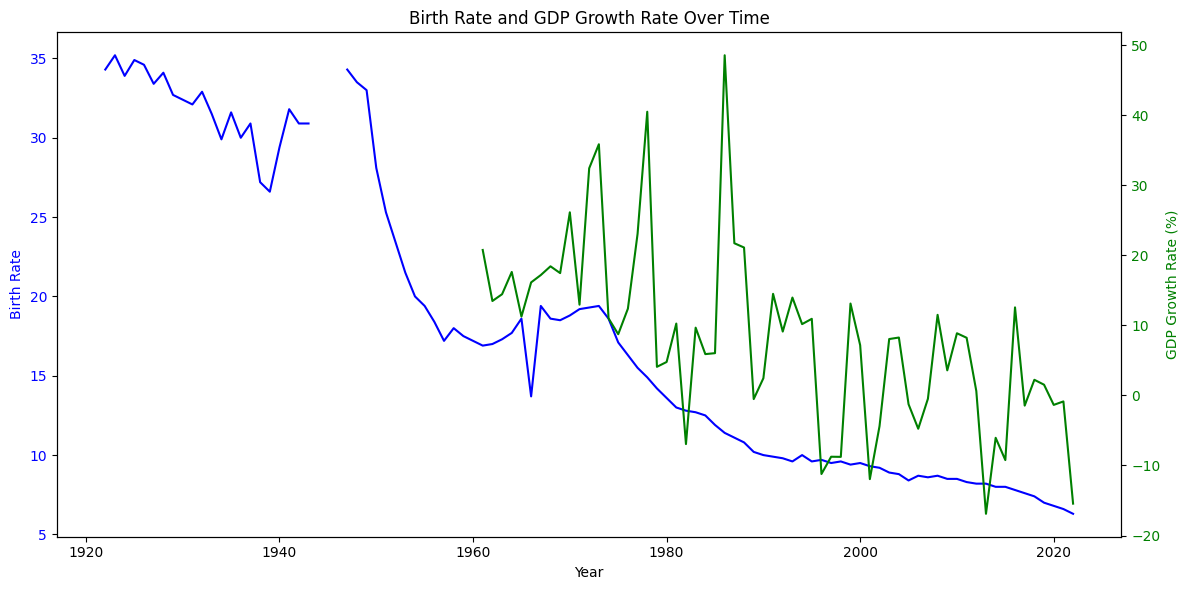

In [29]:
import matplotlib.pyplot as plt

# Creating a figure and a single subplot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting the birth rate on the primary y-axis
ax1.plot(merged_df['year'], merged_df['birth_rate'], color='blue', label='Birth Rate')
ax1.set_xlabel('Year')
ax1.set_ylabel('Birth Rate', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Creating a secondary y-axis for the GDP growth rate
ax2 = ax1.twinx()  
ax2.plot(merged_df['year'], merged_df['gdp_growth_rate'], color='green', label='GDP Growth Rate')
ax2.set_ylabel('GDP Growth Rate (%)', color='green')  
ax2.tick_params(axis='y', labelcolor='green')

# Adding a title and a legend
plt.title('Birth Rate and GDP Growth Rate Over Time')
fig.tight_layout()  
plt.show()

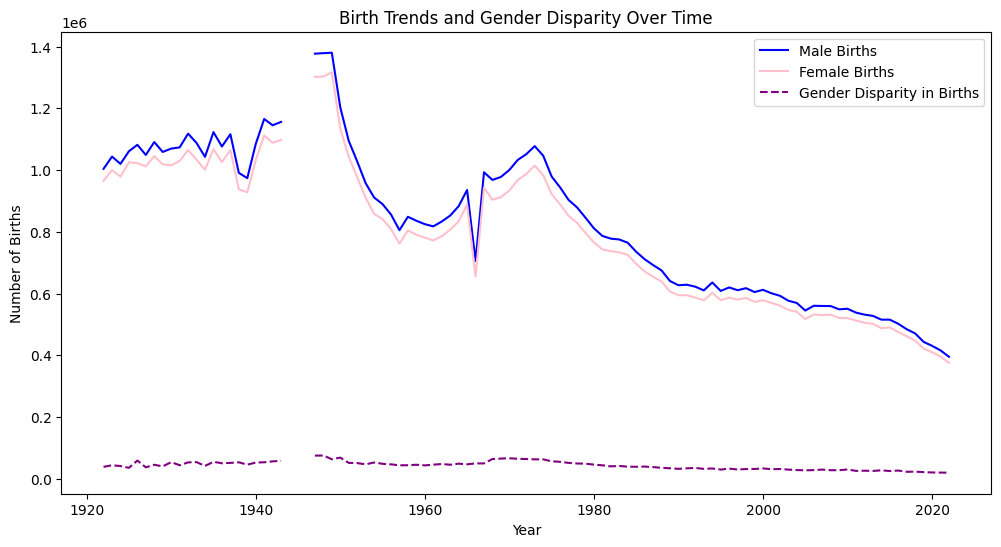

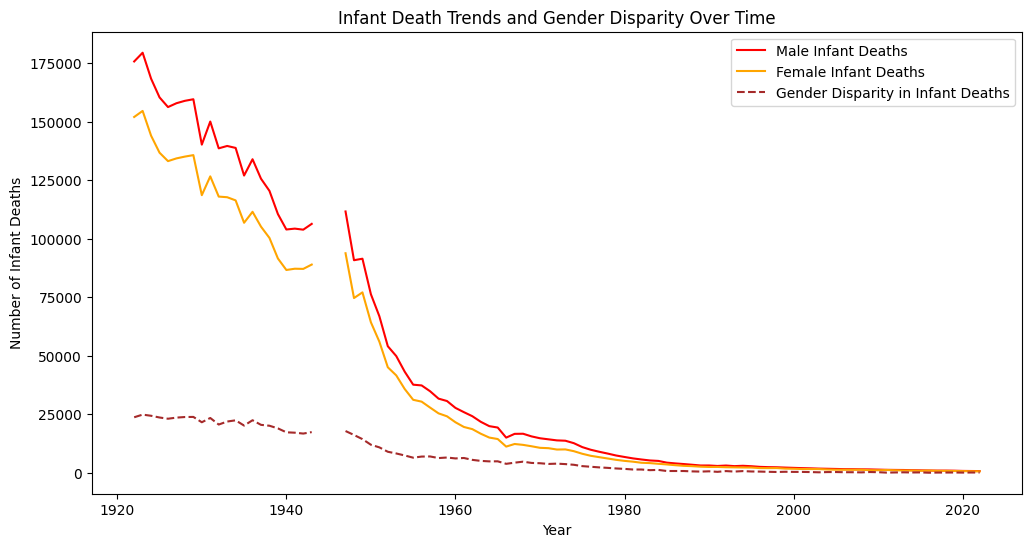

In [33]:
import matplotlib.pyplot as plt

# Plotting for births
plt.figure(figsize=(12, 6))
plt.plot(merged_df['year'], merged_df['birth_male'], label='Male Births', color='blue')
plt.plot(merged_df['year'], merged_df['birth_female'], label='Female Births', color='pink')
plt.plot(merged_df['year'], merged_df['gender_disparity_births'], label='Gender Disparity in Births', color='purple', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Number of Births')
plt.title('Birth Trends and Gender Disparity Over Time')
plt.legend()
plt.show()

# Plotting for infant deaths
plt.figure(figsize=(12, 6))
plt.plot(merged_df['year'], merged_df['infant_death_male'], label='Male Infant Deaths', color='red')
plt.plot(merged_df['year'], merged_df['infant_death_female'], label='Female Infant Deaths', color='orange')
plt.plot(merged_df['year'], merged_df['gender_disparity_deaths'], label='Gender Disparity in Infant Deaths', color='brown', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Number of Infant Deaths')
plt.title('Infant Death Trends and Gender Disparity Over Time')
plt.legend()
plt.show()

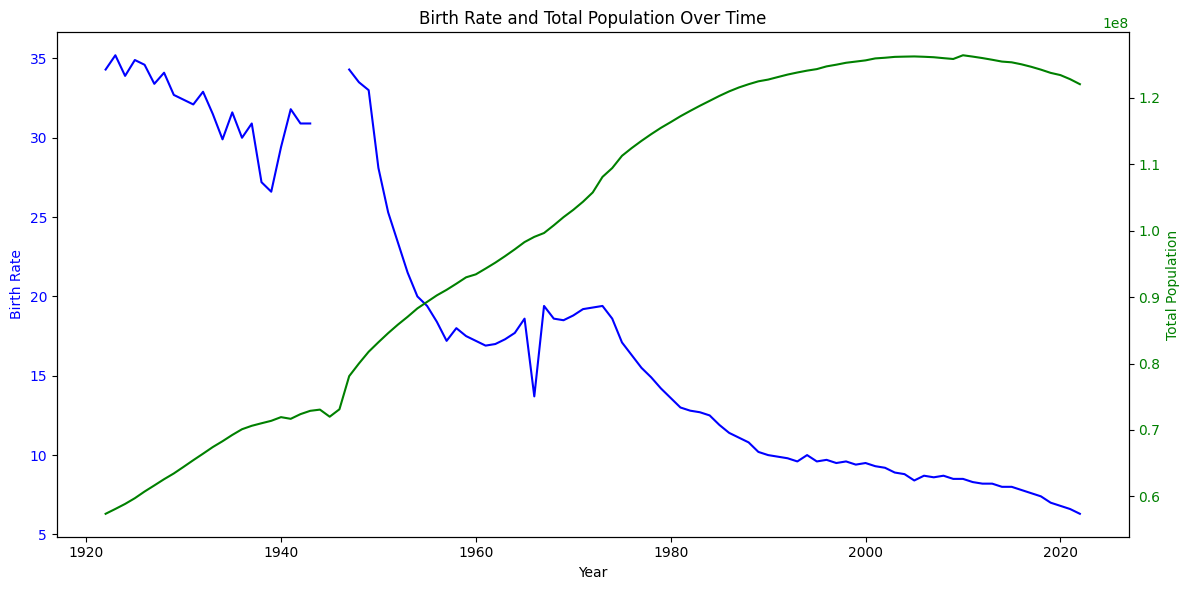

In [34]:
import matplotlib.pyplot as plt

# Creating a figure and a single subplot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting birth rate on the primary y-axis
ax1.plot(merged_df['year'], merged_df['birth_rate'], color='blue', label='Birth Rate')
ax1.set_xlabel('Year')
ax1.set_ylabel('Birth Rate', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Creating a secondary y-axis for the population
ax2 = ax1.twinx()  
ax2.plot(merged_df['year'], merged_df['population_total'], color='green', label='Total Population')
ax2.set_ylabel('Total Population', color='green')  
ax2.tick_params(axis='y', labelcolor='green')

# Adding a title and a legend
plt.title('Birth Rate and Total Population Over Time')
fig.tight_layout()  
plt.show()

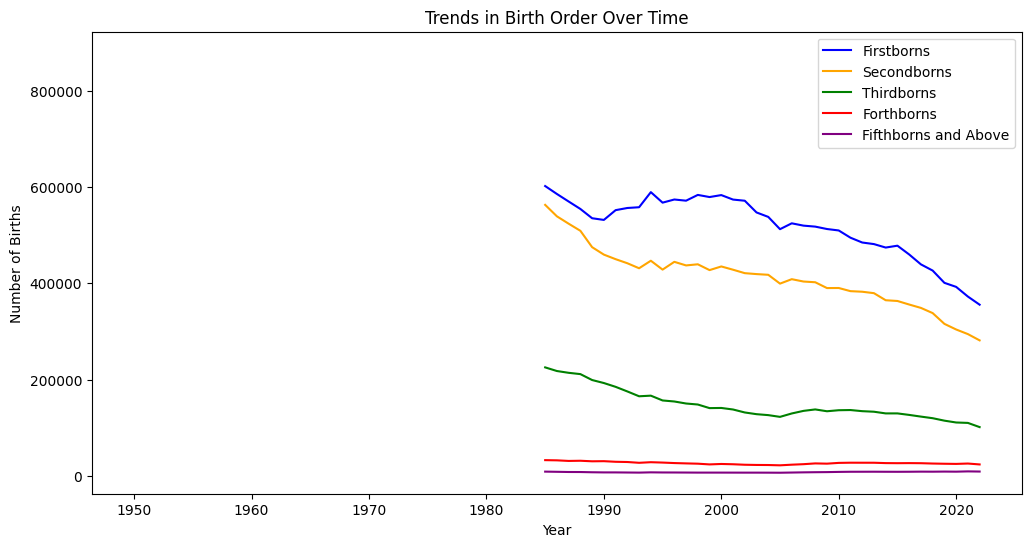

In [35]:
# Plotting for birth orders
plt.figure(figsize=(12, 6))
plt.plot(merged_df['year'], merged_df['firstborn'], label='Firstborns', color='blue')
plt.plot(merged_df['year'], merged_df['secondborn'], label='Secondborns', color='orange')
plt.plot(merged_df['year'], merged_df['thirdborn'], label='Thirdborns', color='green')
plt.plot(merged_df['year'], merged_df['forthborn'], label='Forthborns', color='red')
plt.plot(merged_df['year'], merged_df['fifthborn_and_above'], label='Fifthborns and Above', color='purple')
plt.xlabel('Year')
plt.ylabel('Number of Births')
plt.title('Trends in Birth Order Over Time')
plt.legend()
plt.show()

## Late 1970s:

- Japan experienced rapid economic growth in the post-World War II era, which lasted until the early 1970s. By the late 1970s, the economy began to stabilize and shift from high growth to a more mature, slower growth phase.
- The first oil shock in 1973 and the second in 1979 had significant impacts on the global economy, including Japan's. The economic uncertainty and inflation could have led to a decline in the birth rate as families might delay having children in such times.
- Japan's welfare and healthcare systems were improving, contributing to a lower infant mortality rate and potentially impacting the birth rate.

## 2010s:

- Japan faced a period of economic stagnation and deflation known as the "Lost Decades" starting in the 1990s, which extended into the 2010s. This long-term economic malaise could have affected birth rates as economic conditions are known to influence family planning decisions.
- The country's population has been aging rapidly, with a growing percentage of the population being elderly. This demographic shift could contribute to a lower birth rate and a changing population growth rate.
- The Great East Japan Earthquake and tsunami in March 2011, followed by the Fukushima Daiichi nuclear disaster, had profound social and economic impacts, which may have affected population trends in the short term.

## Late 1960s:

- The late 1960s was a period of high economic growth for Japan, during which the country became one of the world's largest economies.
- This period also saw a shift in societal values and the beginning of a decline in the birth rate as Japan became more urbanized and family planning became more prevalent.
- The introduction of the pill in the 1960s in other countries, and later in Japan, along with other family planning methods, could have contributed to changes in the birth rate.

## 1944-1946:

- This period covers the end of World War II. Japan experienced severe casualties and destruction of infrastructure, which drastically affected population growth.
- The immediate post-war era saw a significant drop in the birth rate due to the disruption of social and family structures, as well as economic hardship.
- Shortly after the war, there was a "baby boom" as soldiers returned home and the country began to rebuild, which led to a sharp increase in the birth rate and altered the population growth rate.


- For each of these periods, the mismatches between birth rate and population growth rate can be attributed to complex interactions between economic conditions, societal changes, government policies, and, in some cases, significant natural or man-made events. Each factor could have had a direct or indirect impact on family planning decisions, mortality rates, and migration patterns, influencing the overall demographic trends of Japan.

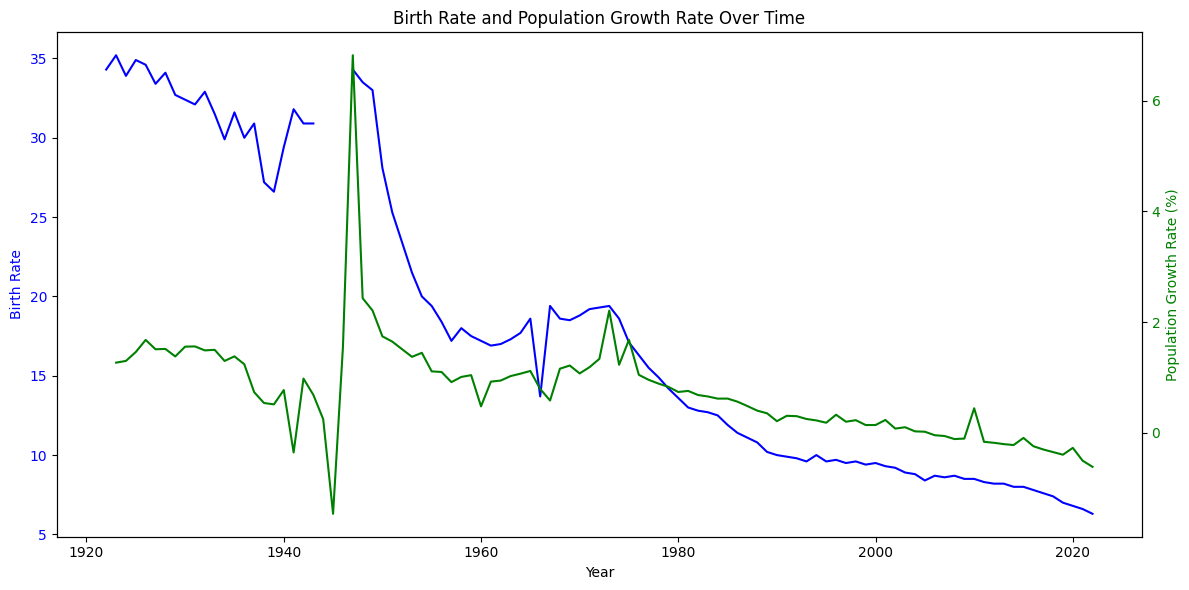

In [37]:
import matplotlib.pyplot as plt

# Creating a figure and a single subplot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting birth rate on the primary y-axis
ax1.plot(merged_df['year'], merged_df['birth_rate'], color='blue', label='Birth Rate')
ax1.set_xlabel('Year')
ax1.set_ylabel('Birth Rate', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Creating a secondary y-axis for the population growth rate
ax2 = ax1.twinx()  
ax2.plot(merged_df['year'], merged_df['population_growth_rate'], color='green', label='Population Growth Rate')
ax2.set_ylabel('Population Growth Rate (%)', color='green')  
ax2.tick_params(axis='y', labelcolor='green')

# Adding a title and a legend
plt.title('Birth Rate and Population Growth Rate Over Time')
fig.tight_layout()  
plt.show()

gdp                            1.000000
stillbirth_gender_ratio        0.974864
early_term_births_ratio        0.942827
year                           0.929168
mother_age_30-34_prop          0.907446
                                 ...   
birth_male                    -0.902464
stillbirth_total              -0.914107
total_fertility_rate          -0.921840
birth_rate                    -0.928717
infant_death_unknown_gender         NaN
Name: gdp, Length: 72, dtype: float64


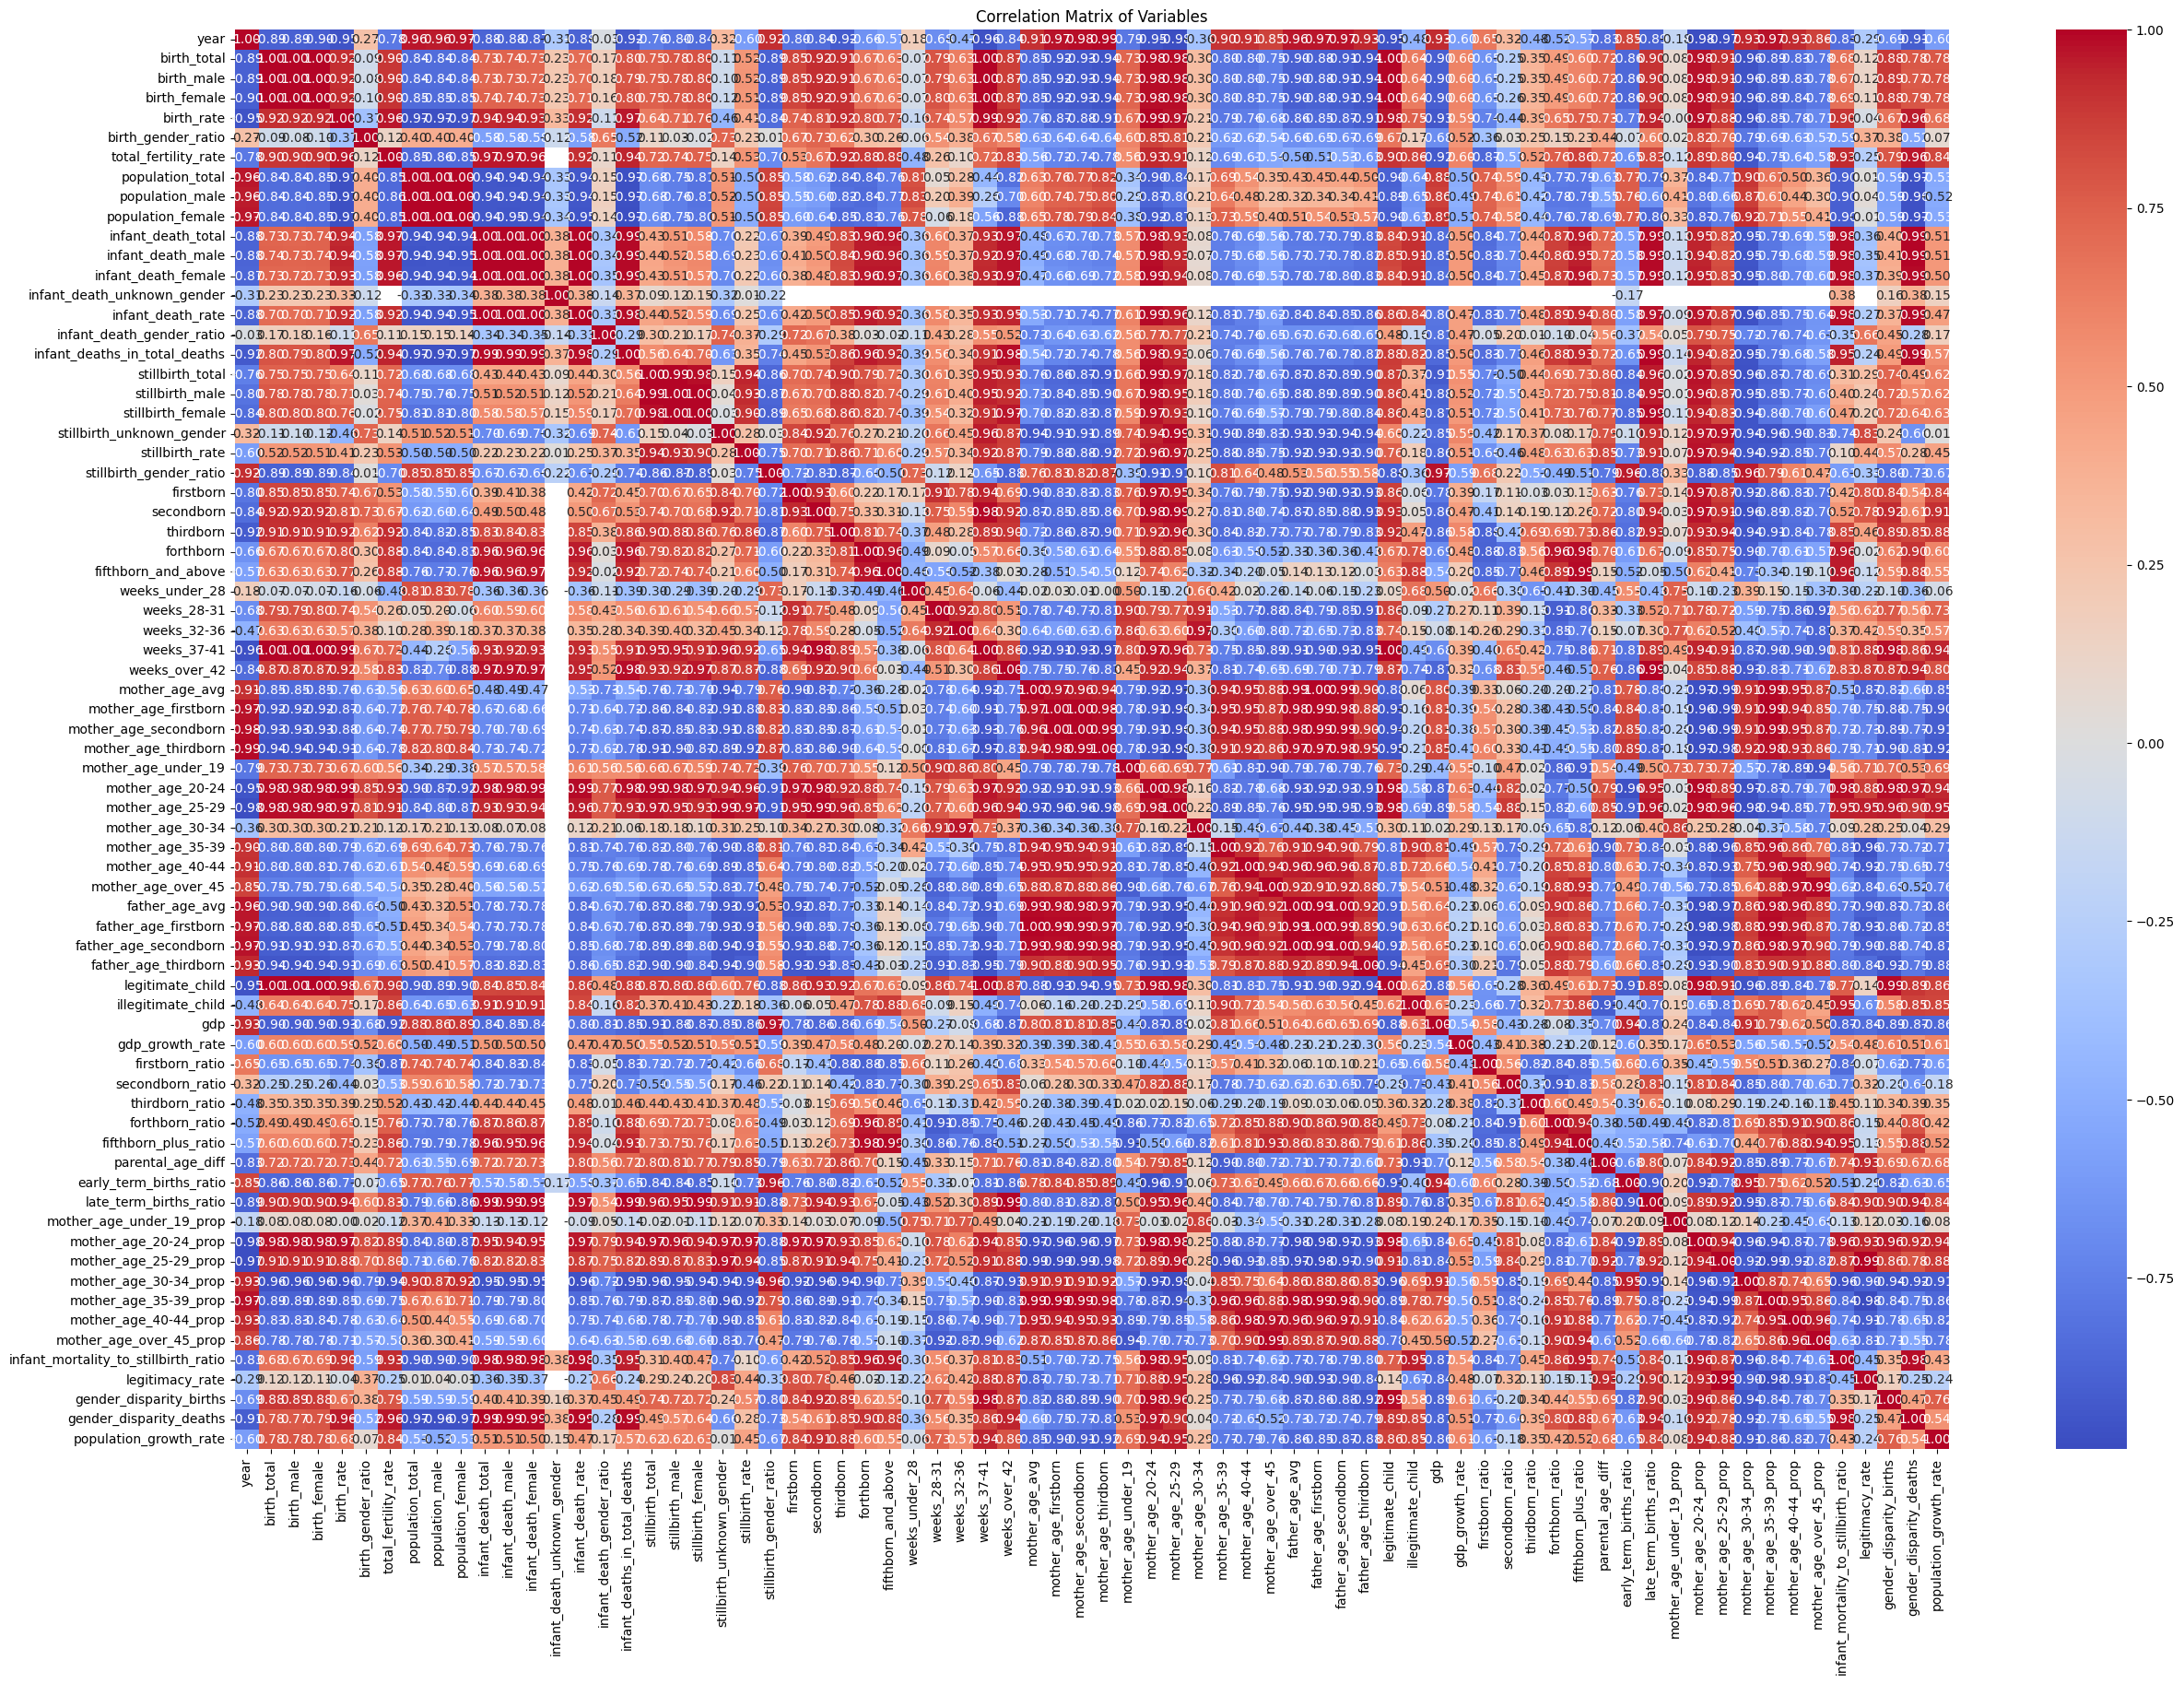

In [41]:
import seaborn as sns

# Compute the Pearson correlation matrix
correlation_matrix = merged_df.corr()

# Extract correlations of GDP with other variables
gdp_correlations = correlation_matrix['gdp'].sort_values(ascending=False)

# Print the correlations
print(gdp_correlations)

# Generating a heatmap
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Variables')
plt.show()


1. Positive Correlations:

- High positive correlations with GDP for variables like stillbirth_gender_ratio, early_term_births_ratio, year, and proportions of births by mothers in the 30-34 age range suggest that as Japan's economy grew, there was a shift towards later motherhood and an increase in stillbirth gender disparities. This could be indicative of broader social and economic changes, such as women participating more in the workforce and having children later in life.
- The positive correlation between GDP and population_female, population_total, population_male suggests a growing population size accompanying economic growth.
- The correlation with the average age of mothers at various birth orders (mother_age_firstborn, mother_age_secondborn, mother_age_thirdborn) being positive indicates that over time, alongside economic growth, the age of mothers at childbirth has increased.

2. Negative Correlations:

- A strong negative correlation with total_fertility_rate and birth_rate suggests that as GDP increased, the fertility rate and birth rate declined. This is consistent with trends seen in developed countries where economic growth is often associated with lower birth rates.
- The negative correlation with population_growth_rate indicates that despite economic growth, the population growth rate has been declining, which could be due to the aforementioned lower birth rates or other demographic factors like aging population.
- The negative correlation with birth_gender_ratio could be reflecting changes in societal or biological factors over time.
- Interestingly, the gdp_growth_rate itself has a negative correlation with GDP, which could indicate that periods of rapid economic growth were followed by periods of slower growth or stabilization.
- The negative correlations with variables related to infant deaths (infant_death_rate, infant_death_gender_ratio, infant_death_total) suggest that as GDP grew, infant mortality rates declined, which is a common trend as countries develop and healthcare improves.

3. Demographic and Social Shifts:

- Negative correlations with the number of births to younger mothers (mother_age_under_19, mother_age_20-24) and the ratios of births to these age groups suggest a societal shift towards older motherhood.
- The negative correlation with legitimacy_rate could point to changing societal norms around marriage and childbearing.

4. Birth Order and Family Size:

- The negative correlations with secondborn_ratio, thirdborn_ratio, and especially fifthborn_and_above indicate a trend towards smaller family sizes.

5. NaN Values:

- The NaN value for infant_death_unknown_gender suggests there may be no variation in this variable, or it could be that the number of unknown gender infant deaths is always zero or missing, making correlation undefined.

From these insights, it appears that economic growth in Japan has been associated with demographic shifts towards older parenthood, smaller families, and improved infant health outcomes. However, it has also been accompanied by a decline in birth rates and overall population growth, which is reflective of the challenges faced by developed economies with aging populations.

These correlations can provide a basis for more in-depth analysis, including causal investigations and policy considerations, especially in areas like healthcare, social welfare, and economic support for families.

In [44]:
pd.set_option('display.max_rows', None)
pd.DataFrame(gdp_correlations)

gdp
gdp                                   1.000000
stillbirth_gender_ratio               0.974864
early_term_births_ratio               0.942827
year                                  0.929168
mother_age_30-34_prop                 0.907446
population_female                     0.892877
population_total                      0.880113
population_male                       0.864806
mother_age_thirdborn                  0.850108
mother_age_35-39                      0.807548
mother_age_firstborn                  0.807093
mother_age_secondborn                 0.805367
mother_age_avg                        0.796362
mother_age_35-39_prop                 0.785082
father_age_thirdborn                  0.690264
mother_age_40-44                      0.656951
father_age_firstborn                  0.656186
father_age_secondborn                 0.652810
father_age_avg                        0.641069
illegitimate_child                    0.629418
mother_age_40-44_prop                 0.622539
firstborn_ratio                       0.578092
mother_age_over_45                    0.505942
weeks_under_28                        0.503504
mother_age_over_45_prop               0.496128
mother_age_under_19_prop              0.244981
mother_age_30-34                      0.020565
forthborn_ratio                      -0.079500
weeks_32-36                          -0.081840
weeks_28-31                          -0.272499
thirdborn_ratio                      -0.281079
fifthborn_plus_ratio                 -0.349459
secondborn_ratio                     -0.434313
mother_age_under_19                  -0.435304
fifthborn_and_above                  -0.538178
gdp_growth_rate                      -0.542731
birth_gender_ratio                   -0.681298
weeks_37-41                          -0.682539
forthborn                            -0.688974
parental_age_diff                    -0.701438
firstborn                            -0.784379
infant_death_rate                    -0.801053
infant_death_gender_ratio            -0.806500
mother_age_25-29_prop                -0.835676
infant_death_female                  -0.837969
legitimacy_rate                      -0.840600
mother_age_20-24_prop                -0.842421
infant_death_total                   -0.843316
infant_death_male                    -0.847019
stillbirth_unknown_gender            -0.849239
infant_deaths_in_total_deaths        -0.853999
thirdborn                            -0.858568
secondborn                           -0.859470
population_growth_rate               -0.861903
stillbirth_rate                      -0.864117
gender_disparity_deaths              -0.865727
weeks_over_42                        -0.866561
late_term_births_ratio               -0.867654
mother_age_20-24                     -0.870326
infant_mortality_to_stillbirth_ratio -0.871076
stillbirth_female                    -0.872719
stillbirth_male                      -0.882109
legitimate_child                     -0.883974
gender_disparity_births              -0.885178
mother_age_25-29                     -0.891502
birth_female                         -0.901796
birth_total                          -0.902176
birth_male                           -0.902464
stillbirth_total                     -0.914107
total_fertility_rate                 -0.921840
birth_rate                           -0.928717
infant_death_unknown_gender                NaN

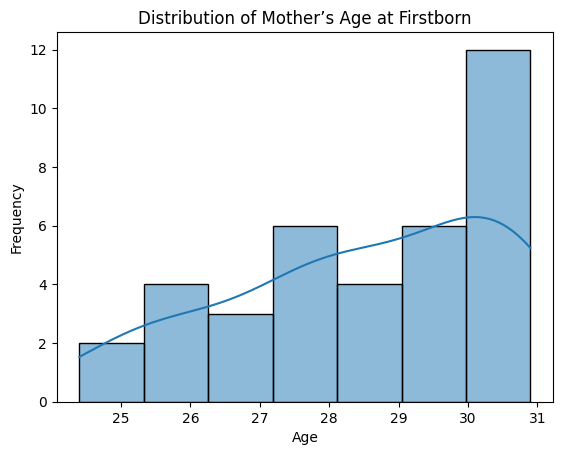

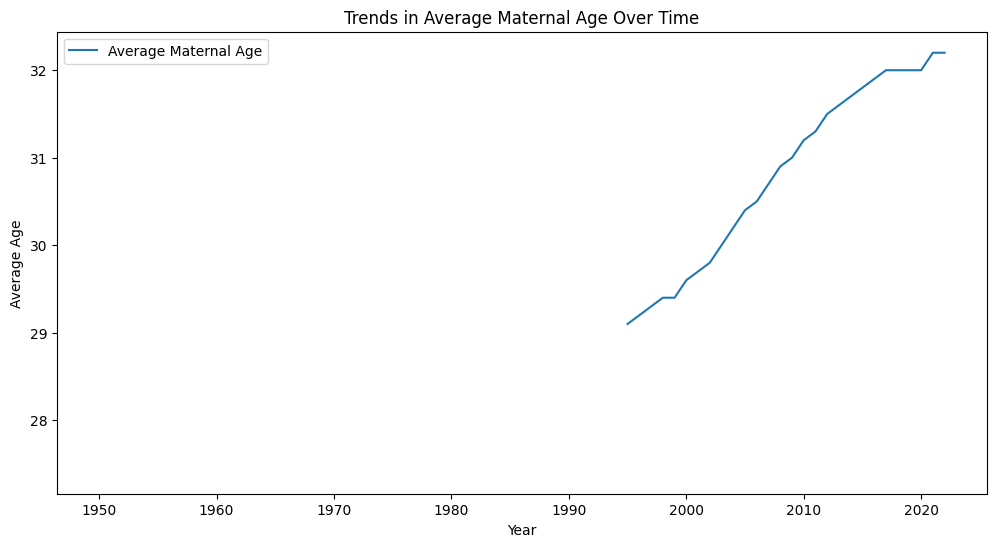

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Age distribution of mothers at the time of firstborns
sns.histplot(data=merged_df, x='mother_age_firstborn', kde=True)
plt.title('Distribution of Mother’s Age at Firstborn')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Trends in maternal age over time
plt.figure(figsize=(12, 6))
plt.plot(merged_df['year'], merged_df['mother_age_avg'], label='Average Maternal Age')
plt.xlabel('Year')
plt.ylabel('Average Age')
plt.title('Trends in Average Maternal Age Over Time')
plt.legend()
plt.show()

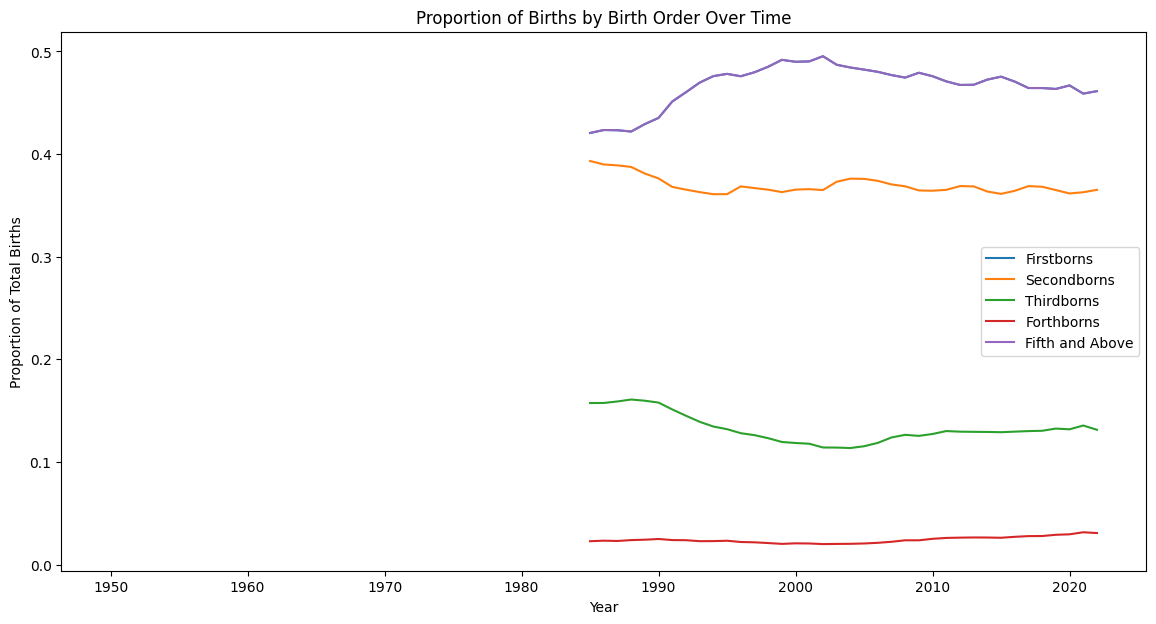

firstborn_prop          0.578092
secondborn_prop        -0.434313
thirdborn_prop         -0.281079
forthborn_prop         -0.079500
fifth_and_above_prop    0.578092
gdp                     1.000000
Name: gdp, dtype: float64


In [48]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'merged_df' is your DataFrame

# Calculate the proportions of each birth order
merged_df['firstborn_prop'] = merged_df['firstborn'] / merged_df['birth_total']
merged_df['secondborn_prop'] = merged_df['secondborn'] / merged_df['birth_total']
merged_df['thirdborn_prop'] = merged_df['thirdborn'] / merged_df['birth_total']
merged_df['forthborn_prop'] = merged_df['forthborn'] / merged_df['birth_total']
merged_df['fifth_and_above_prop'] = merged_df['firstborn'] / merged_df['birth_total']

# Plotting the trends over time
plt.figure(figsize=(14, 7))
plt.plot(merged_df['year'], merged_df['firstborn_prop'], label='Firstborns')
plt.plot(merged_df['year'], merged_df['secondborn_prop'], label='Secondborns')
plt.plot(merged_df['year'], merged_df['thirdborn_prop'], label='Thirdborns')
plt.plot(merged_df['year'], merged_df['forthborn_prop'], label='Forthborns')
plt.plot(merged_df['year'], merged_df['fifth_and_above_prop'], label='Fifth and Above')


plt.xlabel('Year')
plt.ylabel('Proportion of Total Births')
plt.title('Proportion of Births by Birth Order Over Time')
plt.legend()
plt.show()

# Correlation with GDP
birth_order_columns = ['firstborn_prop', 'secondborn_prop', 'thirdborn_prop', 'forthborn_prop', 'fifth_and_above_prop']
correlation_with_gdp = merged_df[birth_order_columns + ['gdp']].corr().loc['gdp']
print(correlation_with_gdp)

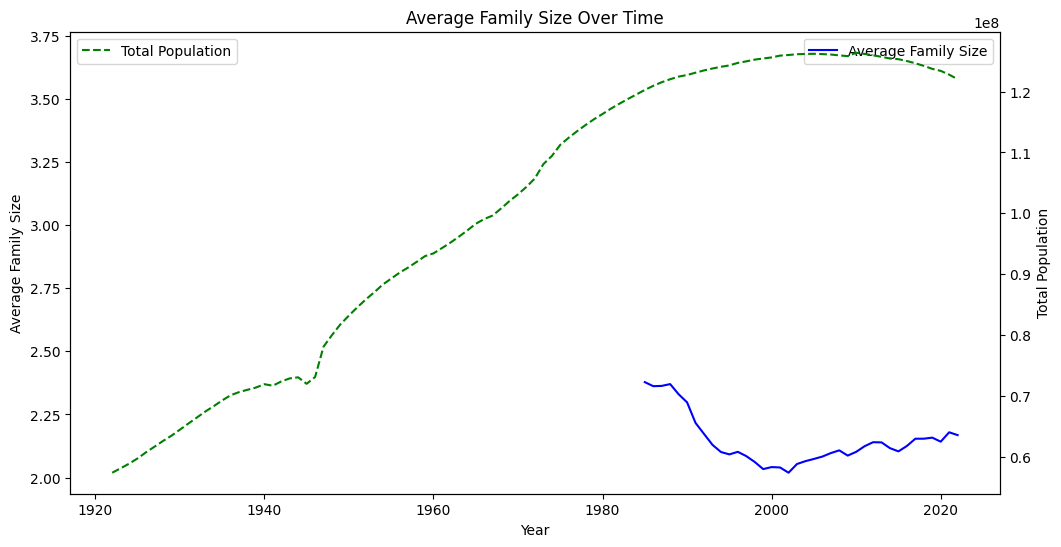

In [49]:
import matplotlib.pyplot as plt

# Calculate the average number of children per family (simplified example)
# Note: This is a simplification, the actual calculation may need to account for more factors
merged_df['average_family_size'] = (merged_df['firstborn'] + merged_df['secondborn'] + merged_df['thirdborn'] +
                             merged_df['forthborn'] + merged_df['fifthborn_and_above']) / merged_df['firstborn']

# Plotting average family size
plt.figure(figsize=(12, 6))
plt.plot(merged_df['year'], merged_df['average_family_size'], label='Average Family Size', color='blue')
plt.xlabel('Year')
plt.ylabel('Average Family Size')
plt.title('Average Family Size Over Time')
plt.legend()
plt.twinx()

# Plotting total population
plt.plot(merged_df['year'], merged_df['population_total'], label='Total Population', color='green', linestyle='--')
plt.ylabel('Total Population')
plt.legend(loc='upper left')
plt.show()

In [51]:
merged_df.dtypes

year                                      int32
birth_total                             float64
birth_male                              float64
birth_female                            float64
birth_rate                              float64
birth_gender_ratio                      float64
total_fertility_rate                    float64
population_total                          int64
population_male                           int64
population_female                         int64
infant_death_total                      float64
infant_death_male                       float64
infant_death_female                     float64
infant_death_unknown_gender             float64
infant_death_rate                       float64
infant_death_gender_ratio               float64
infant_deaths_in_total_deaths           float64
stillbirth_total                        float64
stillbirth_male                         float64
stillbirth_female                       float64
stillbirth_unknown_gender               

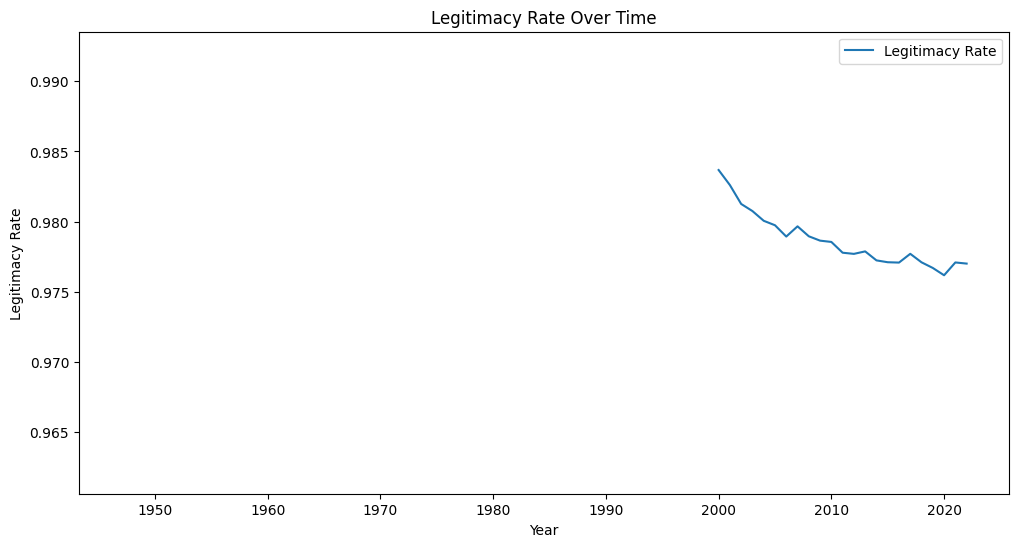

In [56]:
import matplotlib.pyplot as plt

# Assuming 'merged_df' has columns 'legitimate_child' and 'illegitimate_child'

# Calculate the legitimacy rate
merged_df['legitimacy_rate'] = merged_df['legitimate_child'] / (merged_df['legitimate_child'] + merged_df['illegitimate_child'])

# Plot the legitimacy rate over time
plt.figure(figsize=(12, 6))
plt.plot(merged_df['year'], merged_df['legitimacy_rate'], label='Legitimacy Rate')
plt.xlabel('Year')
plt.ylabel('Legitimacy Rate')
plt.title('Legitimacy Rate Over Time')
plt.legend()
plt.show()

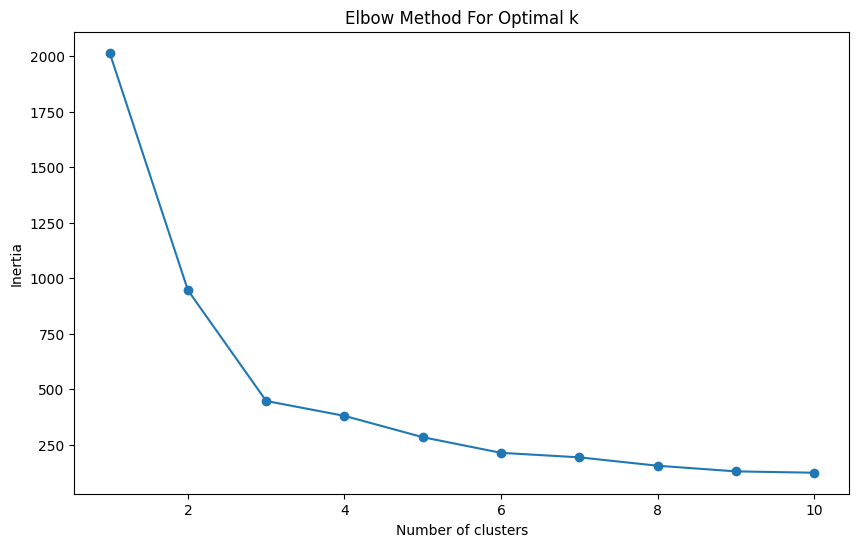

year  birth_total  birth_male  birth_female  birth_rate  \
23   1922    1969314.0   1004022.0      965292.0        34.3   
24   1923    2043297.0   1043599.0      999698.0        35.2   
25   1924    1998520.0   1019988.0      978532.0        33.9   
26   1925    2086091.0   1060827.0     1025264.0        34.9   
27   1926    2104405.0   1081793.0     1022611.0        34.6   
28   1927    2060737.0   1048946.0     1011791.0        33.4   
29   1928    2135852.0   1090702.0     1045150.0        34.1   
30   1929    2077026.0   1058666.0     1018360.0        32.7   
31   1930    2085101.0   1069551.0     1015549.0        32.4   
32   1931    2102784.0   1073385.0     1029399.0        32.1   
33   1932    2182742.0   1117954.0     1064788.0        32.9   
34   1933    2121253.0   1087688.0     1033565.0        31.5   
35   1934    2043783.0   1042736.0     1001047.0        29.9   
36   1935    2190704.0   1122867.0     1067836.0        31.6   
37   1936    2101969.0   1076197.0     1025772.0        30.0   
38   1937    2180734.0   1116154.0     1064580.0        30.9   
39   1938    1928321.0    990888.0      937433.0        27.2   
40   1939    1901573.0    973744.0      927829.0        26.6   
41   1940    2115867.0   1084282.0     1031585.0        29.4   
42   1941    2277283.0   1165437.0     1111846.0        31.8   
43   1942    2233660.0   1145068.0     1088592.0        30.9   
44   1943    2253535.0   1155983.0     1097552.0        30.9   
45   1944          NaN         NaN           NaN         NaN   
46   1945          NaN         NaN           NaN         NaN   
47   1946          NaN         NaN           NaN         NaN   
48   1947    2678792.0   1376986.0     1301806.0        34.3   
49   1948    2681624.0   1378564.0     1303060.0        33.5   
50   1949    2696638.0   1380008.0     1316630.0        33.0   
51   1950    2337507.0   1203111.0     1134396.0        28.1   
52   1951    2137689.0   1094641.0     1043048.0        25.3   
53   1952    2005162.0   1028061.0      977101.0        23.4   
54   1953    1868040.0    957524.0      910516.0        21.5   
55   1954    1769580.0    911212.0      858368.0        20.0   
56   1955    1730692.0    889670.0      841022.0        19.4   
57   1956    1665278.0    856084.0      809194.0        18.4   
58   1957    1566713.0    805220.0      761493.0        17.2   
59   1958    1653469.0    848733.0      804736.0        18.0   
60   1959    1626088.0    835822.0      790266.0        17.5   
61   1960    1606041.0    824761.0      781280.0        17.2   
62   1961    1589372.0    817599.0      771773.0        16.9   
63   1962    1618616.0    833269.0      785347.0        17.0   
64   1963    1659521.0    852561.0      806960.0        17.3   
65   1964    1716761.0    882924.0      833837.0        17.7   
66   1965    1823697.0    935366.0      888331.0        18.6   
67   1966    1360974.0    705463.0      655511.0        13.7   
68   1967    1935647.0    992778.0      942869.0        19.4   
69   1968    1871839.0    967996.0      903843.0        18.6   
70   1969    1889815.0    977687.0      912128.0        18.5   
71   1970    1934239.0   1000403.0      933836.0        18.8   
72   1971    2000973.0   1032937.0      968036.0        19.2   
73   1972    2038682.0   1051389.0      987293.0        19.3   
74   1973    2091983.0   1077517.0     1014466.0        19.4   
75   1974    2029989.0   1046538.0      983451.0        18.6   
76   1975    1901440.0    979091.0      922349.0        17.1   
77   1976    1832617.0    943829.0      888788.0        16.3   
78   1977    1755100.0    903380.0      851720.0        15.5   
79   1978    1708643.0    879149.0      829494.0        14.9   
80   1979    1642580.0    845884.0      796696.0        14.2   
81   1980    1576889.0    811418.0      765471.0        13.6   
82   1981    1529455.0    786596.0      742859.0        13.0   
83   1982    1515392.0    777855.0      737537.0        12.8   
84   1983    1508687.0    775206.0   

In [71]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
from kneed import KneeLocator


# Assuming 'merged_df' is your DataFrame and it contains the columns you want to cluster by
features = merged_df[['birth_total', 'birth_male', 'birth_female', 'birth_rate', 'birth_gender_ratio', 'population_total', 'population_male', 'population_female', 'infant_death_total', 'infant_death_male', 'infant_death_female', 'infant_death_unknown_gender', 'infant_death_rate', 'infant_death_gender_ratio', 'infant_deaths_in_total_deaths', 'stillbirth_total', 'stillbirth_male', 'stillbirth_female', 'stillbirth_unknown_gender', 'stillbirth_rate', 'stillbirth_gender_ratio']].dropna()

# Normalize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply k-means clustering
# Use the elbow method to find the optimal number of clusters
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Use KneeLocator to find the elbow point
kn = KneeLocator(range(1, 11), inertia, curve='convex', direction='decreasing')
optimal_k = kn.elbow

# Fit KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
features['cluster'] = kmeans.fit_predict(features_scaled)

# Add the cluster labels to the original DataFrame
merged_df['cluster'] = np.nan
merged_df.loc[features.index, 'cluster'] = features['cluster']

merged_df

/Users/jevan/Development/python_mac_mini_projects/japan_births_py/japan_venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/jevan/Development/python_mac_mini_projects/japan_births_py/japan_venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/jevan/Development/python_mac_mini_projects/japan_births_py/japan_venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/jevan/Development/python_mac_mini_projects/japan_births_py/japan_venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Pred

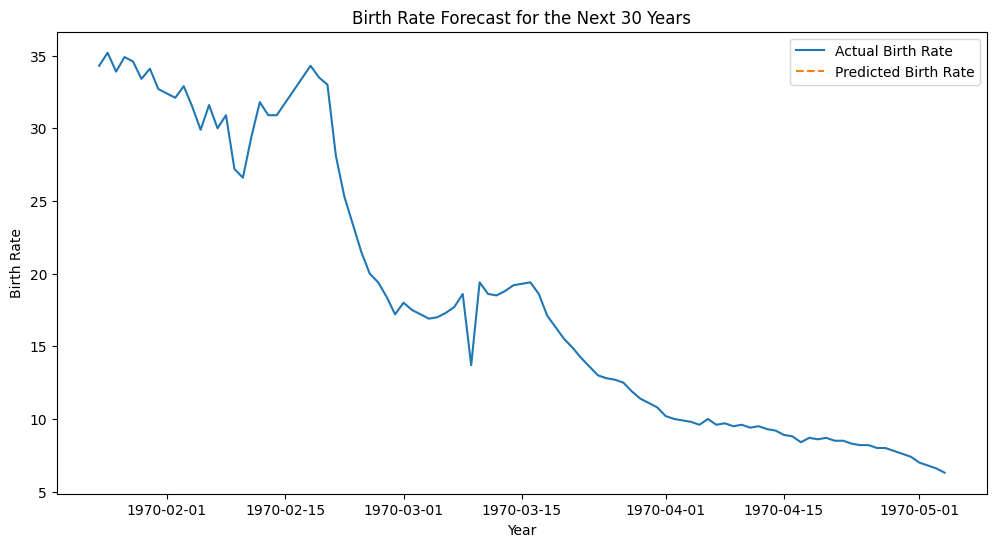

In [72]:
from statsmodels.tsa.arima.model import ARIMA

# Assuming 'birth_rate' is the series you want to forecast
birth_rate_series = merged_df['birth_rate'].dropna()  # Ensure there are no NaN values

# Fit the ARIMA model (you might need to find optimal parameters p, d, q)
model = ARIMA(birth_rate_series, order=(1, 1, 1))  # These are example parameters
fitted_model = model.fit()

# Forecast the next 30 years (assuming data is in years)
birth_rate_forecast = fitted_model.get_forecast(steps=30)
forecast_index = pd.date_range(start=birth_rate_series.index[-1], periods=31, freq='Y')[1:]
forecast_df = pd.DataFrame(birth_rate_forecast.predicted_mean, index=forecast_index, columns=['predicted_birth_rate'])

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(birth_rate_series.index, birth_rate_series, label='Actual Birth Rate')
plt.plot(forecast_df.index, forecast_df['predicted_birth_rate'], label='Predicted Birth Rate', linestyle='--')
plt.title('Birth Rate Forecast for the Next 30 Years')
plt.xlabel('Year')
plt.ylabel('Birth Rate')
plt.legend()
plt.show()

In [75]:
forecast_index

DatetimeIndex(['1971-12-31 00:00:00.000000123',
               '1972-12-31 00:00:00.000000123',
               '1973-12-31 00:00:00.000000123',
               '1974-12-31 00:00:00.000000123',
               '1975-12-31 00:00:00.000000123',
               '1976-12-31 00:00:00.000000123',
               '1977-12-31 00:00:00.000000123',
               '1978-12-31 00:00:00.000000123',
               '1979-12-31 00:00:00.000000123',
               '1980-12-31 00:00:00.000000123',
               '1981-12-31 00:00:00.000000123',
               '1982-12-31 00:00:00.000000123',
               '1983-12-31 00:00:00.000000123',
               '1984-12-31 00:00:00.000000123',
               '1985-12-31 00:00:00.000000123',
               '1986-12-31 00:00:00.000000123',
               '1987-12-31 00:00:00.000000123',
               '1988-12-31 00:00:00.000000123',
               '1989-12-31 00:00:00.000000123',
               '1990-12-31 00:00:00.000000123',
               '1991-12-31 00:00:00.0000